The purpose of this notebook is to explore Scott's question/observation that Turicibacter seems to actually be Helicobacter. I've noticed that my gastric samples don't have helicobacter, but I'm pretty sure they have lots of turicibacter. Let's find out!

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [2]:
fname = '../../data/clean/rosen.otu_table.rel_abun.clean'
fmeta = '../../data/clean/rosen.metadata.clean'

df = pd.read_csv(fname, sep='\t', index_col=0)
meta = pd.read_csv(fmeta, sep='\t', index_col=0)

In [3]:
meta.query('site == "gastric_fluid"').shape

(169, 958)

In [6]:
o = [i for i in df.columns if 'uricibacter' in i]
print(o)

['k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Turicibacter;s__;d__denovo229']


In [9]:
tmp = pd.merge(meta, df[o], left_index=True, right_index=True, how='inner')
print(df.shape, meta.shape, tmp.shape)

((586, 1578), (586, 958), (586, 959))


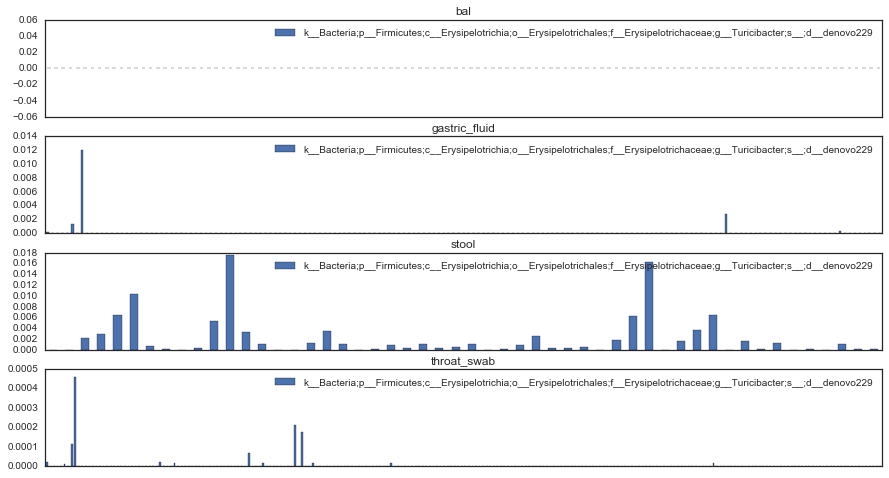

In [30]:
# Keep only bal, gastric_fluid, stool, and throat_swab samples
sites = ['bal', 'gastric_fluid', 'stool', 'throat_swab']
tmp = tmp.query('site == @sites')
#g = sns.FacetGrid(row='site', data=tmp, sharex=False, sharey=False)
#g.map(sns.barplot, x="sample_id.1", y=o)

fig, ax = plt.subplots(len(sites), 1, figsize=(15,8))

for i in range(len(sites)):
    site = sites[i]
    subdf = tmp.query('site == @site')
    subdf[o].plot(kind='bar', ax=ax[i])
    ax[i].set_xticklabels('')
    ax[i].set_title(site)

In [34]:
tmp.groupby('site')[o].describe()

k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Turicibacter;s__;d__denovo229  \
                                                                                                                                    count   
site                                                                                                                                        
bal                                                        115.0                                                                            
gastric_fluid                                              169.0                                                                            
stool                                                       52.0                                                                            
throat_swab                                                236.0                                                                            

                                                                                
                   mean       std  min       25%       50%       75%       max  
site                                                                            
bal            0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  
gastric_fluid  0.000099  0.000954  0.0  0.000000  0.000000  0.000000  0.012030  
stool          0.002051  0.003693  0.0  0.000095  0.000653  0.001967  0.017505  
throat_swab    0.000005  0.000036  0.0  0.000000  0.000000  0.000000  0.000460